# Mg/Ca Worked Example

In practice, you will calculate the free energies for each phase from some method (e.g. [calphy](https://calphy.org/en/latest/))
and then use `landau` for the plotting.  This data was obtained from Atomic Cluster Expansion models run by `calphy`.

## Load Free Energies into Landau

Here, we read the free energies as a function of temperature from a dataframe.

### Prelude

In [2]:
import pandas as pd
import landau as ld

### Load Free Energies

In [3]:
df = pd.read_pickle("MgCaFreeEnergies.pckl.gz")

In [4]:
def build(row):
    return ld.phases.TemperatureDependentLinePhase(row.phase, row.composition, row.temperature, row.free_energy, interpolator=ld.interpolate.SGTE(4))

In [5]:
df['phaseobj'] = df.apply(build, axis=1)

In [6]:
df

,phase,composition,temperature,free_energy,state,phaseobj
0,hcp Mg,0.000000,"[300.0, 300.0042000588008, 300.0084002352066, ...","[-1.5225154593605692, -1.5225168694102966, -1....",solid,"TemperatureDependentLinePhase(""hcp Mg"")"
1,bcc Ca,1.000000,"[300.0, 300.00461545700705, 300.0092310560326,...","[-1.9342844504225414, -1.9342865724018383, -1....",solid,"TemperatureDependentLinePhase(""bcc Ca"")"
2,Mg$_2$Ca,0.333333,"[300.0, 300.0042000588008, 300.0084002352066, ...","[-1.781469669607899, -1.7814711895104098, -1.7...",solid,"TemperatureDependentLinePhase(""Mg$_2$Ca"")"
4,fcc Ca,1.000000,"[300.0, 300.0042000588008, 300.0084002352066, ...","[-1.9365957848456883, -1.9365976398227, -1.936...",solid,"TemperatureDependentLinePhase(""fcc Ca"")"
14,liquid,0.333273,"[800.0, 800.0053333635558, 800.0106667982238, ...","[-2.020797043491122, -2.020801126471374, -2.02...",liquid,"TemperatureDependentLinePhase(""liquid"")"
15,liquid,0.666636,"[800.0, 800.0053333635558, 800.0106667982238, ...","[-2.161913993730873, -2.1619183103650097, -2.1...",liquid,"TemperatureDependentLinePhase(""liquid"")"
18,liquid,0.000000,"[600.0, 600.0060000600006, 600.0120002400048, ...","[-1.632069098400621, -1.6320727216435675, -1.6...",liquid,"TemperatureDependentLinePhase(""liquid"")"
19,liquid,1.000000,"[1000.0, 1000.0057143126531, 1000.011428690613...","[-2.3851575945277173, -2.3851625203296583, -2....",liquid,"TemperatureDependentLinePhase(""liquid"")"
22,liquid,0.166636,"[800.0, 800.0053333635558, 800.0106667982238, ...","[-1.9109840875275999, -1.9109880541330522, -1....",liquid,"TemperatureDependentLinePhase(""liquid"")"
23,liquid,0.500000,"[800.0, 800.0053333635558, 800.0106667982238, ...","[-2.1026342137400933, -2.102638434385509, -2.1...",liquid,"TemperatureDependentLinePhase(""liquid"")"


In [7]:
def combine(dd):
    if len(dd) == 1:
        return dd.phaseobj.iloc[0]
    else:
        return ld.phases.InterpolatingPhase(dd.phase.iloc[0], dd.phaseobj.tolist(), num_coeffs=3)

In [8]:
phases = df.groupby('phase')[df.columns].apply(combine).tolist()

### Check Interpolation

In [9]:
import matplotlib.pyplot as plt

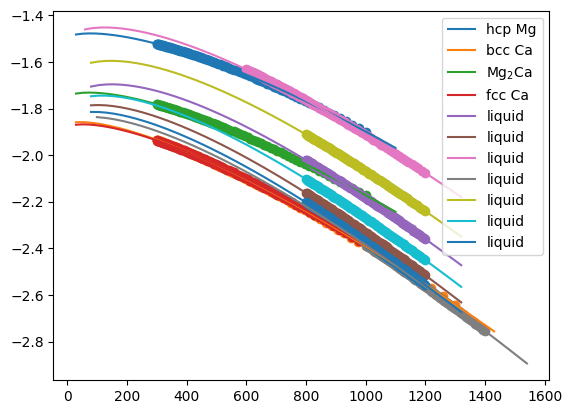

In [10]:
for p in df.phaseobj:
    p.check_interpolation(Tl=.1)
plt.legend()

### Save to Pickle

In [11]:
import pickle

In [12]:
with open("MgCaPhases.pckl", 'wb') as f:
    pickle.dump(phases, f)

## Plotting Diagrams

With the phase objects created `landau` can calculate and plot the phase diagram for us.

### Prelude

In [13]:
import pandas as pd
import landau as ld
import numpy as np
import seaborn as sns

### Load

Read existing phase objects from file.

In [14]:
phases = pd.read_pickle("MgCaPhases.pckl")

### Calculate Diagram

In [15]:
%%time
df = ld.calculate.calc_phase_diagram(
    phases,
    Ts=np.linspace(100, 1500, 50),
    mu=150,
    keep_unstable=True
)

CPU times: user 6.69 s, sys: 17.2 ms, total: 6.71 s
Wall time: 6.78 s


In [16]:
df

,T,phase,phi,mu,c,stable,border,refined,f,f_excess
0,100.000000,Mg$_2$Ca,-1.480066,-0.757406,0.333333,True,True,no,-1.732535,-0.123050
1,100.000000,Mg$_2$Ca,-1.482567,-0.749905,0.333333,True,True,no,-1.732535,-0.123050
2,100.000000,Mg$_2$Ca,-1.485065,-0.742411,0.333333,True,True,no,-1.732535,-0.123050
3,100.000000,Mg$_2$Ca,-1.487513,-0.735066,0.333333,True,True,no,-1.732535,-0.123050
4,100.000000,Mg$_2$Ca,-1.489922,-0.727839,0.333333,True,True,no,-1.732535,-0.123050
...,...,...,...,...,...,...,...,...,...,...
38576,549.789157,Mg$_2$Ca,-1.805706,-0.265398,0.333333,True,True,delaunay-triple,-1.894172,0.058977
38577,549.789157,bcc Ca,-1.805706,-0.265398,1.000000,True,True,delaunay-triple,-2.071104,0.000000
38578,736.553962,liquid,-1.730833,-0.808065,0.083914,True,True,delaunay-triple,-1.798641,-0.045205
38579,736.553962,hcp Mg,-1.730833,-0.808065,0.000000,True,True,delaunay-triple,-1.730833,0.000000


### Plot

### Raw

<Axes: xlabel='c', ylabel='T'>

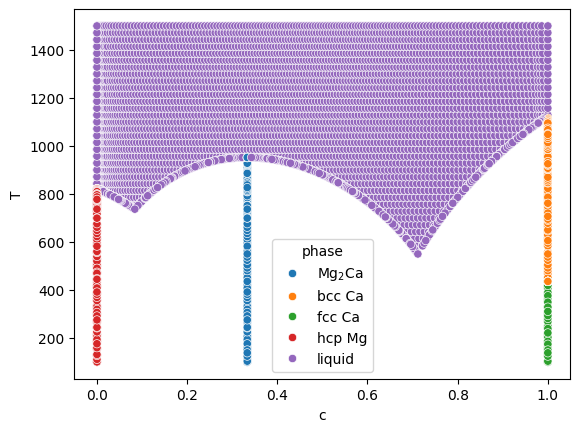

In [17]:
sns.scatterplot(
    data=df.query('stable'),
    x='c', y='T',
    hue='phase',
)

### Colorful

/home/pmrv/.mamba/envs/landau/lib/python3.13/site-packages/landau/poly.py:37: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return self.prepare(df).groupby(['phase', 'phase_unit']).apply(


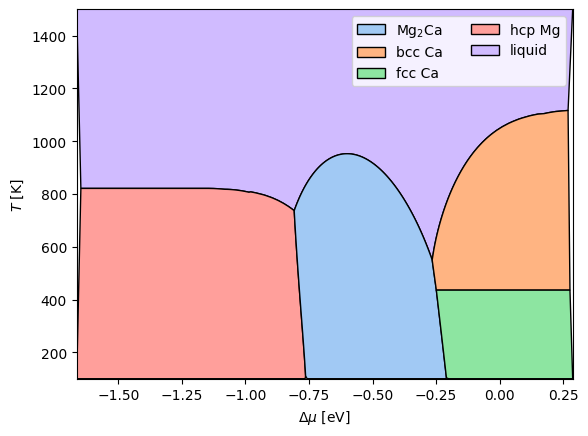

In [18]:
ld.plot.plot_mu_phase_diagram(df)

/home/pmrv/.mamba/envs/landau/lib/python3.13/site-packages/landau/poly.py:37: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return self.prepare(df).groupby(['phase', 'phase_unit']).apply(
/home/pmrv/.mamba/envs/landau/lib/python3.13/site-packages/landau/plot.py:96: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tdf.groupby("border_segment").apply(plot_tie)


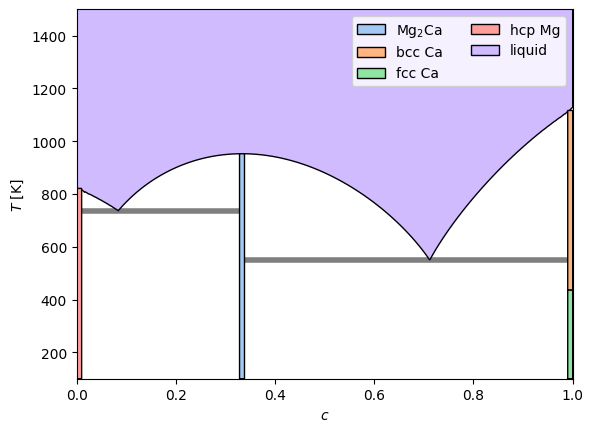

In [19]:
ld.plot.plot_phase_diagram(df, tielines=True)